<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/AirfoilS809_SAmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-auth

In [2]:
from google.colab import auth
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !ls /content/drive/MyDrive/


In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Create a Model class
class Model(nn.Module):
  def __init__(self,in_features=5, h1 = 61, h2 = 60, out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    # self.dropout1 = nn.Dropout(0.05)
    self.fc2 = nn.Linear(h1,h2)
    # self.dropout2 = nn.Dropout(0.05)
    # self.fc3 = nn.Linear(h2,h3)
    # self.dropout3 = nn.Dropout(0.25)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    # x = self.dropout1(x)
    x = F.sigmoid(self.fc2(x))
    # x = self.dropout2(x)
    # x = F.sigmoid(self.fc3(x))
    # x = self.dropout3(x)
    x = self.out(x)

    return x

In [7]:
torch.manual_seed(42)

model = Model()

In [8]:
# Read the data set -  Airfoil S809
df1 = pd.read_csv("/content/drive/MyDrive/data_set1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/data_set2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/data_set3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/data_set4.csv")


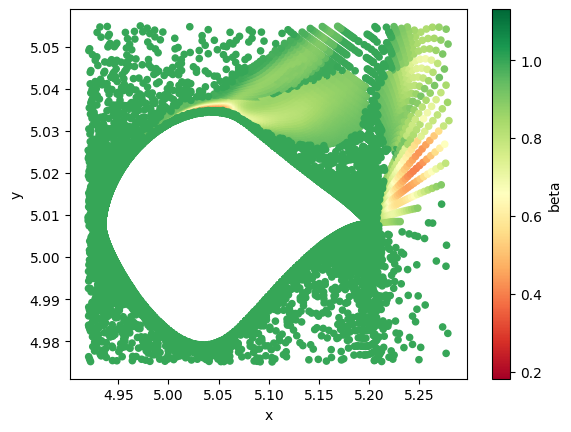

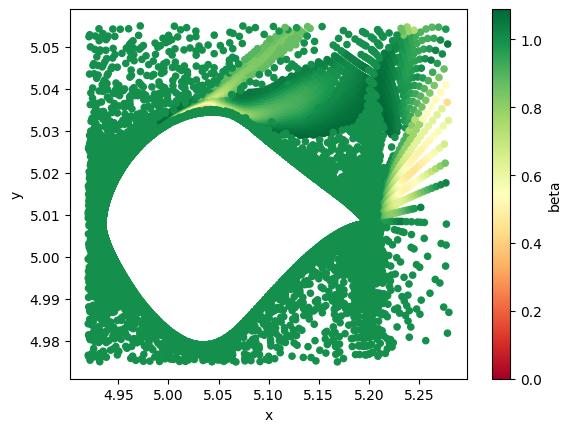

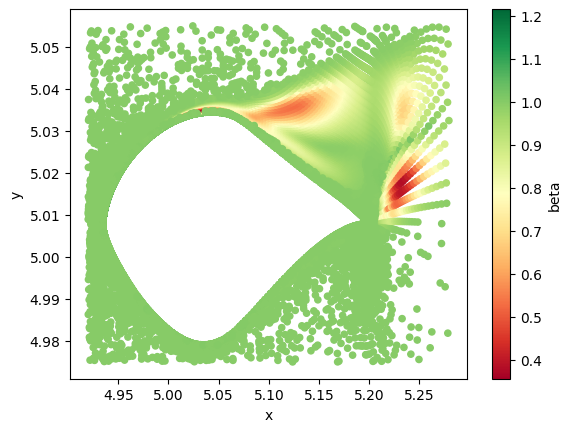

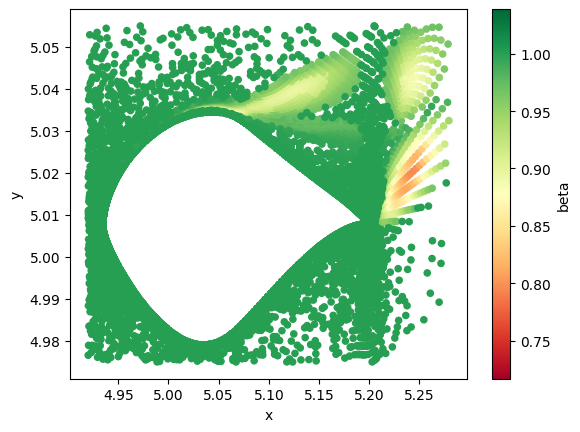

In [9]:
# Combine data
frames = [df1, df2, df3, df4]
ff = []

for item in frames:
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['beta'])
  ff1 = np.array(item['feature1'])
  ff2 = np.array(item['feature2'])
  ff3 = np.array(item['feature3'])
  ff4 = np.array(item['feature4'])
  ff5 = np.array(item['feature5'])
  ff6 = np.array(item['feature6'])

  # Normalize x and y coordinates
  min_range = -5.0
  max_range = 5.0
  xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


  # #####################################################################
  # # Cleaning the beta field in the wake region
  # for k in range(len(xc)):
  #   if xc[k] >= 5.2 and xc[k] <= 5.3:
  #     if yc[k] >= 5.00 and yc[k] <= 4.96:
  #       b2.append(b[k])

  # for j in range(len(xc)):
  #   if xc[j] > 5.15 or yc[j]>5.04:
  #     b[j] = np.mean(b2)

  x1,y1,b1,f1,f2,f3,f4,f5,f6 = [[] for i in range(9)]
  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=4.92 and xc[i]<=5.28:
      if yc[i]>=4.975 and yc[i]<=5.055:
        # if (b[i]<0.995) | (b[i]>1.005):
          x1.append(xc[i])
          y1.append(yc[i])
          b1.append(b[i])
          f1.append(ff1[i])
          f2.append(ff2[i])
          f3.append(ff3[i])
          f4.append(ff4[i])
          f5.append(ff5[i])
          f6.append(ff6[i])
        # else:
        #   nnn = np.random.uniform(0,1)
        #   if nnn < 0.10:
        #     x1.append(xc[i])
        #     y1.append(yc[i])
        #     b1.append(b[i])
        #     f1.append(ff1[i])
        #     f2.append(ff2[i])
        #     f3.append(ff3[i])
        #     f4.append(ff4[i])
        #     f5.append(ff5[i])
        #     f6.append(ff6[i])

  modified_data = {
  'x': np.array(x1),
  'y': np.array(y1),
  'beta': np.array(b1),
  'feature1': np.array(f1),
  'feature2': np.array(f2),
  'feature3': np.array(f3),
  'feature4': np.array(f4),
  'feature5': np.array(f5),
  'feature6': np.array(f6)
  }




  cf = pd.DataFrame(modified_data)
  # Data for beta>1.005 or beta<0.995
  s1 = cf[(cf['beta'] < 0.995) | (cf['beta'] > 1.005)]
  s2 = cf[(cf['beta'] >= 0.995) & (cf['beta'] <= 1.005)]


  s3 = s2.sample(frac=0.20, random_state=1)
  df_filtered = pd.concat([s1, s3], ignore_index=True)

  # df_filtered.shape[0], s1.shape[0], s2.shape[0], s3.shape[0]

  ax = df_filtered.plot.scatter(x='x',
                      y='y',
                      c='beta',
                      colormap='RdYlGn')

  ff.append(df_filtered)

  # # #####################################################################
  # # Plotting cleaned data
  # ################################
  # nx = []
  # ny = []
  # nb = []


  # # Filter data for the specified range of coordinates
  # for i in range(len(xc)):
  #   if xc[i]>=4.9 and xc[i]<=5.3:
  #     if yc[i]>=4.925 and yc[i]<=5.075:
  #       nx.append(xc[i])
  #       ny.append(yc[i])
  #       nb.append(b[i])

  # # Create a scatter plot
  # plt.scatter(x1, y1, c=b1,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
  # plt.colorbar(label='Beta Field')
  # plt.xlabel('X Coordinate')
  # plt.ylabel('Y Coordinate')
  # plt.title('Domain for training')
  # plt.show()
###############################################################################

df = pd.concat(ff)


# # Data for beta>1.02 or beta<0.98
# df_filtered = df[(df['beta'] < 0.995) | (df['beta'] > 1.005)]

# df_filtered = df[df['beta'] != 1.0]

# df_filtered = df



In [10]:
# # Data for beta>1.005 or beta<0.995
# s1 = df[(df['beta'] < 0.995) | (df['beta'] > 1.005)]
# s2 = df[(df['beta'] >= 0.995) & (df['beta'] <= 1.005)]


# s3 = s2.sample(frac=0.1, random_state=1)
# df_filtered = pd.concat([s1, s3], ignore_index=True)

# df_filtered.shape[0], s1.shape[0], s2.shape[0], s3.shape[0]

<Axes: xlabel='feature3', ylabel='Density'>

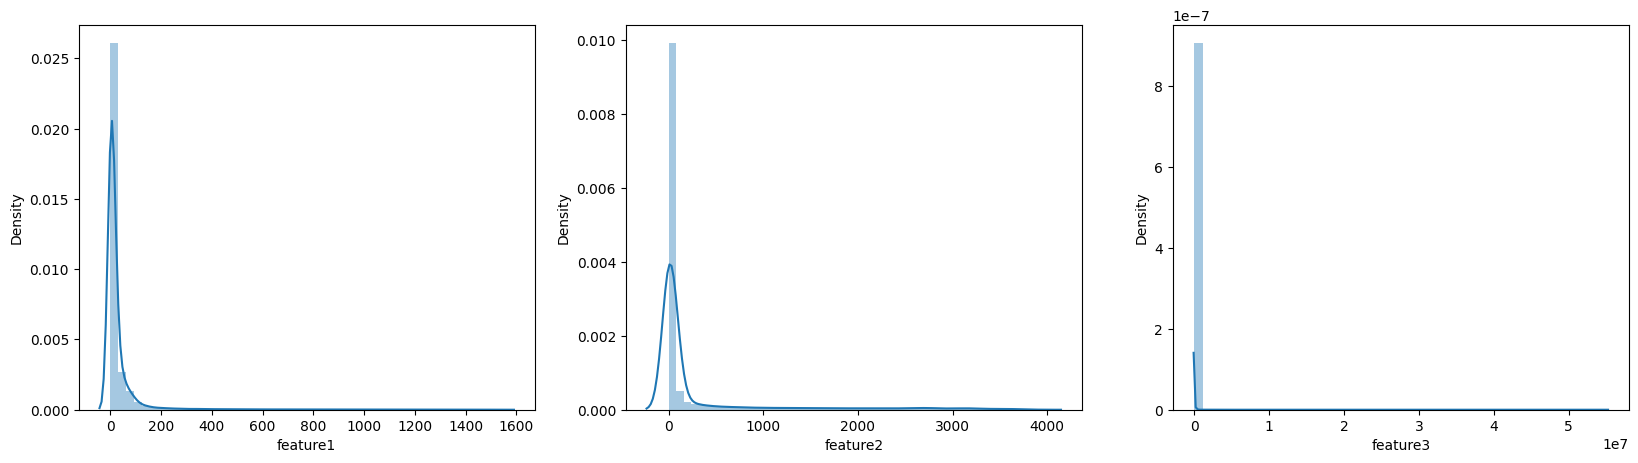

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




# # Preprocess Features
# df1 = df_filtered.drop(['x','y','beta'],axis=1)
# df2 = df_filtered.drop(['x','y','feature1','feature2','feature3','feature4','feature5','feature6'],axis=1)

df1 = df.drop(['x','y','beta','feature4'],axis=1)
df2 = df.drop(['x','y','feature1','feature2','feature3','feature4','feature5','feature6'],axis=1)


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df1['feature1'])
plt.subplot(1,3,2)
sns.distplot(df1['feature2'])
plt.subplot(1,3,3)
sns.distplot(df1['feature3'])



<Axes: xlabel='feature6', ylabel='Density'>

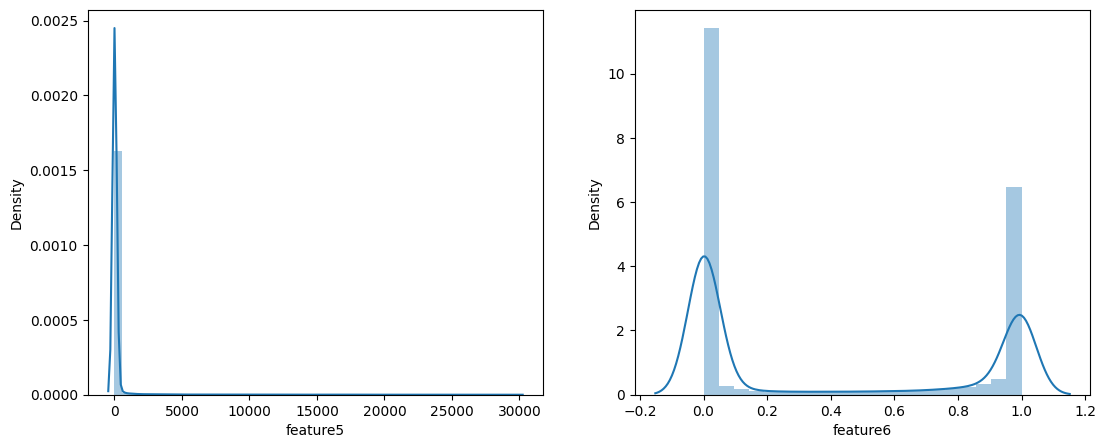

In [12]:
plt.figure(figsize=(20,5))
# plt.subplot(1,3,1)
# sns.distplot(df1['feature4'])
plt.subplot(1,3,2)
sns.distplot(df1['feature5'])
plt.subplot(1,3,3)
sns.distplot(df1['feature6'])

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler





# # Fill missing values with the mean
# df1 = df1.fillna(df1.mean())
# m = df1.max()
# df1 = df1.div(m)

df1.min(),df1.max()

(feature1    0.000017
 feature2    0.003978
 feature3    0.012101
 feature5   -1.546520
 feature6    0.000000
 dtype: float64,
 feature1    1.547650e+03
 feature2    3.911090e+03
 feature3    5.517923e+07
 feature5    2.978158e+04
 feature6    1.000000e+00
 dtype: float64)

In [14]:

# Standardization
# standard_scaler = StandardScaler()
# min_max_scaler = MinMaxScaler(feature_range=(0, 1))
# # transformer = Normalizer()
# scaler = RobustScaler(with_centering=False)

# Features
# X = min_max_scaler.fit_transform(df1)
X = df1.values

# # Target
# # y = df_filtered['beta'].values
# # y = standard_scaler.fit_transform(df2)
# min_max_scaler = MinMaxScaler(feature_range=(0, 1))
# y = min_max_scaler.fit_transform(df2)
# # y = scaler.fit_transform(df2)
y = df2.values

In [15]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001,weight_decay=0.0000001)
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001,weight_decay=0.0)

In [16]:
#5-Fold Cross Validation
from sklearn import metrics

from sklearn.model_selection import KFold
kFold=KFold(n_splits=8,shuffle=True, random_state=100)

# Initialize a list to store the evaluation scores
scores = []
training_cost = []
testing_cost =[]
iterations = 4000
train_fold = [[] for i in range(8)]
test_fold = [[] for i in range(8)]
c = 0
for train_index,test_index in kFold.split(X):
  print("Train Index: ", train_index, "\n")
  print("Test Index: ", test_index)
  print("Size of training data:", len(train_index),"\n")
  print("Size of testing data:", len(test_index),"\n")

  X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]


  X_train = torch.FloatTensor(X_train)
  X_test = torch.FloatTensor(X_test)

  y_train = torch.FloatTensor(y_train)
  y_test = torch.FloatTensor(y_test)


  losses = []
  for i in range(iterations):
    # go forward and predict
    y_pred = model.forward(X_train)

    # Measure the loss
    loss = criterion(y_pred,y_train)

    # Keep track of the losses
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
      print(f'iter: {i} and loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_fold[c].append(y_pred.detach().numpy())
  train_fold[c].append(y_train.detach().numpy())
  training_cost.append(losses)

  # Evaluate Model
  with torch.no_grad():
    y_eval = model.forward(X_test)
    test_loss = criterion(y_eval,y_test)
  test_fold[c].append(y_eval.detach().numpy())
  test_fold[c].append(y_test.detach().numpy())

  testing_cost.append(test_loss)
  scores.append(metrics.mean_squared_error(y_eval,y_test))
  print('MSEloss: {}'.format(testing_cost))
  print('MSE error: {}'.format(scores))

  c = c+1

Train Index:  [    0     1     2 ... 64490 64491 64492] 

Test Index:  [    8    22    25 ... 64465 64468 64475]
Size of training data: 56431 

Size of testing data: 8062 

iter: 0 and loss: 1.5892747640609741
iter: 10 and loss: 0.49983468651771545
iter: 20 and loss: 0.0658375695347786
iter: 30 and loss: 0.01357879675924778
iter: 40 and loss: 0.027909766882658005
iter: 50 and loss: 0.01524459756910801
iter: 60 and loss: 0.009500226005911827
iter: 70 and loss: 0.010093031451106071
iter: 80 and loss: 0.009475148282945156
iter: 90 and loss: 0.009067916311323643
iter: 100 and loss: 0.008969909511506557
iter: 110 and loss: 0.008815552107989788
iter: 120 and loss: 0.008682950399816036
iter: 130 and loss: 0.008551159873604774
iter: 140 and loss: 0.008416024968028069
iter: 150 and loss: 0.008318523876369
iter: 160 and loss: 0.008228100836277008
iter: 170 and loss: 0.008143714629113674
iter: 180 and loss: 0.008068309165537357
iter: 190 and loss: 0.007997337728738785
iter: 200 and loss: 0.007930

Text(0.5, 1.0, 'Fold5')

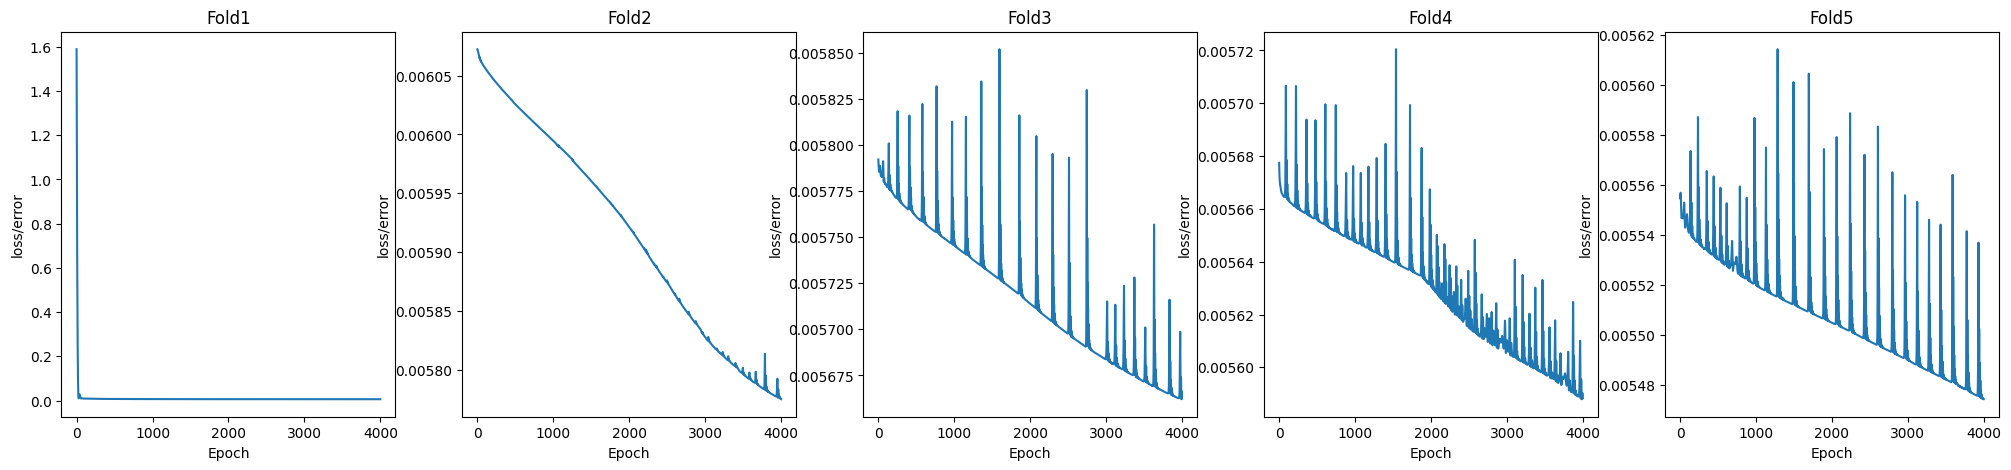

In [17]:
plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
plt.plot(range(iterations), training_cost[0])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold1')
plt.subplot(1,5,2)
plt.plot(range(iterations), training_cost[1])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold2')
plt.subplot(1,5,3)
plt.plot(range(iterations), training_cost[2])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold3')
plt.subplot(1,5,4)
plt.plot(range(iterations), training_cost[3])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold4')
plt.subplot(1,5,5)
plt.plot(range(iterations), training_cost[4])
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.title('Fold5')

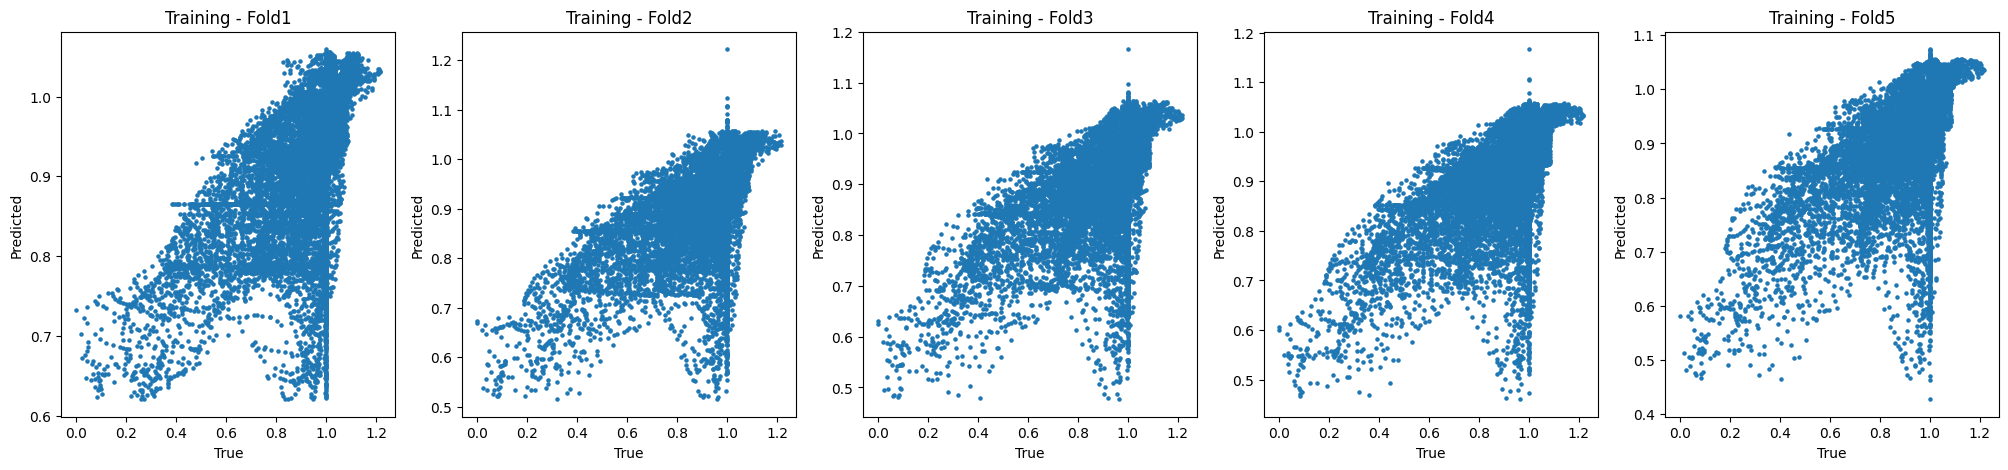

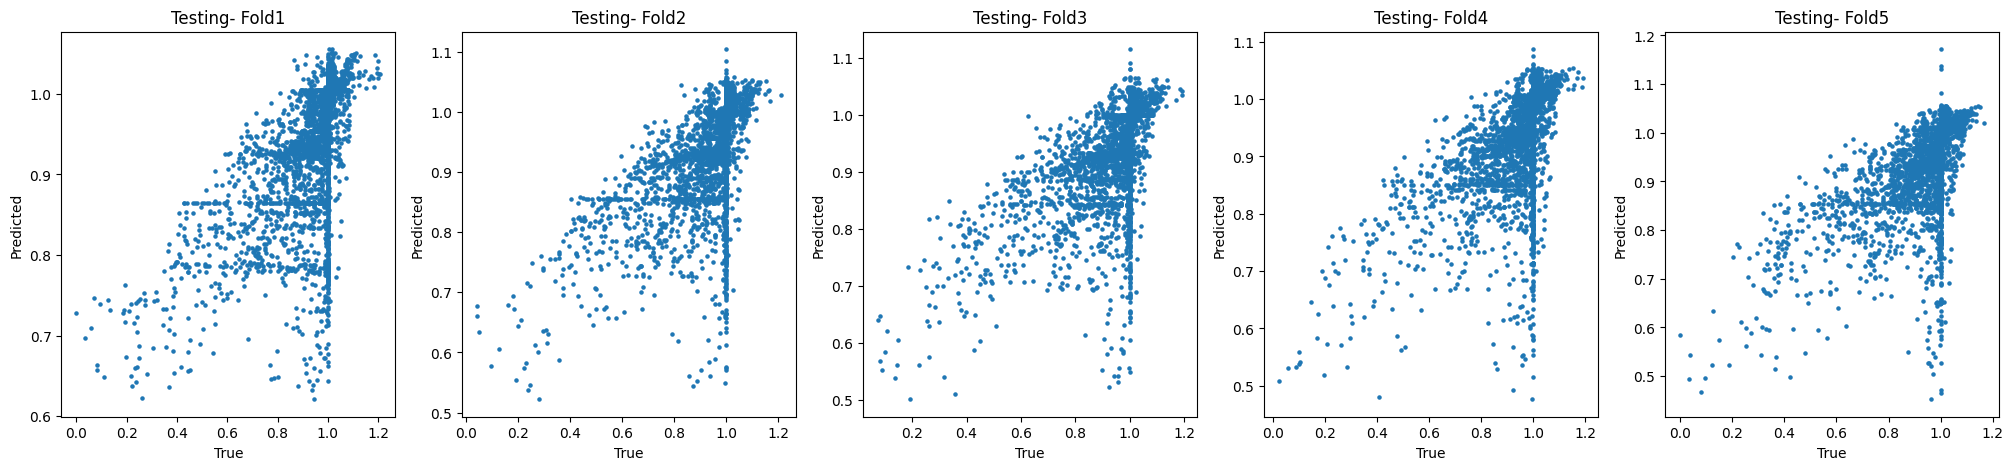

In [18]:
plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
plt.scatter(train_fold[0][1],train_fold[0][0], s=5)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Training - Fold1')
plt.subplot(1,5,2)
plt.scatter(train_fold[1][1],train_fold[1][0], s=5)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Training - Fold2')
plt.subplot(1,5,3)
plt.scatter(train_fold[2][1],train_fold[2][0], s=5)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Training - Fold3')
plt.subplot(1,5,4)
plt.scatter(train_fold[3][1],train_fold[3][0], s=5)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Training - Fold4')
plt.subplot(1,5,5)
plt.scatter(train_fold[4][1],train_fold[4][0], s=5)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Training - Fold5')
# plt.ylim(-4,2)

plt.show()

plt.figure(figsize=(25,5))
plt.subplot(1,5,1)
plt.scatter(test_fold[0][1],test_fold[0][0],s =5 )
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Testing- Fold1')
plt.subplot(1,5,2)
plt.scatter(test_fold[1][1],test_fold[1][0],s =5 )
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Testing- Fold2')
plt.subplot(1,5,3)
plt.scatter(test_fold[2][1],test_fold[2][0],s =5 )
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Testing- Fold3')
plt.subplot(1,5,4)
plt.scatter(test_fold[3][1],test_fold[3][0],s =5 )
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Testing- Fold4')
plt.subplot(1,5,5)
plt.scatter(test_fold[4][1],test_fold[4][0],s =5 )
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Testing- Fold5')


plt.show()

In [19]:
print(model)



Model(
  (fc1): Linear(in_features=5, out_features=61, bias=True)
  (fc2): Linear(in_features=61, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=1, bias=True)
)


In [20]:
list(model.parameters())

[Parameter containing:
 tensor([[ 1.4732e-01,  1.2918e-02, -8.8942e-03,  2.2078e-01,  2.0165e-02],
         [ 1.7247e-01, -2.4917e-01,  3.5269e-01,  3.1545e-01, -1.2766e+00],
         [-2.6714e-01,  1.3891e-02,  4.9248e-01,  3.4733e-01,  1.2041e+00],
         [-1.1307e-01,  4.6145e-01,  4.8259e-02, -3.1728e-01,  6.5875e-01],
         [-7.5387e-01, -1.1733e-01, -1.4819e-02,  7.4986e-01, -3.3209e-01],
         [ 2.5704e-01, -1.0392e-01, -1.8158e-01, -5.5203e-01, -1.2645e+00],
         [ 5.8544e-01, -1.6007e+00,  6.8757e-02,  1.9924e-01, -1.0585e+00],
         [ 6.9849e-02,  1.3040e-02,  2.7119e-02,  2.6985e-01, -5.6633e-01],
         [-8.0717e-02, -2.3840e-01,  1.4009e-01,  4.9242e-01,  1.0474e+00],
         [-1.9785e-01,  4.3549e-01,  2.8896e-02,  1.7858e-01, -1.4033e+00],
         [-9.3894e-01, -2.3487e-01, -6.9872e-02,  6.5833e-01, -4.3684e-01],
         [-3.7262e-01,  5.5642e-01,  4.9697e-02,  5.1443e-01,  1.0340e-01],
         [ 7.8426e-01, -1.2391e+00,  2.5351e+00, -4.3442e-01,  5.

In [21]:
xx = model.fc1.weight

In [22]:
np.shape(xx)

torch.Size([61, 5])

In [23]:
# Save our NN Model
torch.save(model.state_dict(), '/content/drive/MyDrive/airfoil_model.pt')
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('/content/drive/MyDrive/airfoil_model.pt'))

<All keys matched successfully>

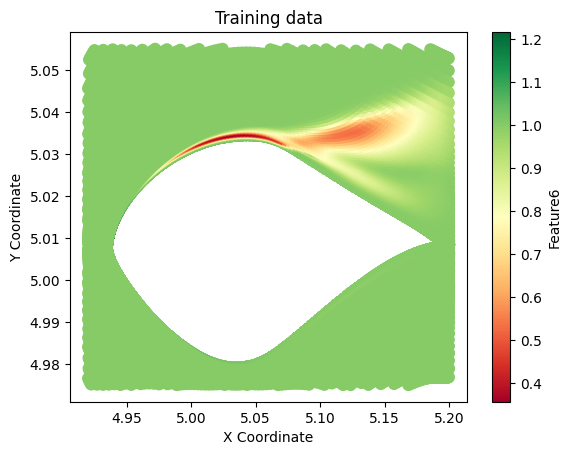

In [24]:
dff = pd.read_csv("/content/drive/MyDrive/data_set3.csv")

# dff.loc[dff['beta']<0.995, "beta"] = 1.5
# dff.loc[dff['beta']>1.005, "beta"] = 1.5


frames = [dff]
ff = []

for item in frames:
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['beta'])
  ff1 = np.array(item['feature1'])
  ff2 = np.array(item['feature2'])
  ff3 = np.array(item['feature3'])
  # ff4 = np.array(item['feature4'])
  ff5 = np.array(item['feature5'])
  ff6 = np.array(item['feature6'])

  # Normalize x and y coordinates
  min_range = -5.0
  max_range = 5.0
  xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


  x1,y1,b1,f1,f2,f3,f4,f5,f6 = [[] for i in range(9)]
  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
    if xc[i]>=4.92 and xc[i]<=5.20:
      if yc[i]>=4.975 and yc[i]<=5.055:
        # if (b[i]<0.995) | (b[i]>1.005):
          x1.append(xc[i])
          y1.append(yc[i])
          b1.append(b[i])
          f1.append(ff1[i])
          f2.append(ff2[i])
          f3.append(ff3[i])
          # f4.append(ff4[i])
          f5.append(ff5[i])
          f6.append(ff6[i])

  modified_data = {
  'x': np.array(x1),
  'y': np.array(y1),
  'beta': np.array(b1),
  'feature1': np.array(f1),
  'feature2': np.array(f2),
  'feature3': np.array(f3),
  # 'feature4': np.array(f4),
  'feature5': np.array(f5),
  'feature6': np.array(f6)
  }


  ff.append(pd.DataFrame(modified_data))

  # Create a scatter plot
  plt.scatter(x1, y1, c=b1,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
  plt.colorbar(label='Feature6')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('Training data')
  plt.show()
###############################################################################

dff1 = pd.concat(ff)


In [25]:
dff2 = dff1.drop(['x','y','beta'],axis=1)
X2 = dff2.values
X2 = torch.FloatTensor(X2)
y2 = new_model.forward(X2)
y2 = y2.detach().numpy()

In [26]:
print(y2)

[[0.99949604]
 [0.99951   ]
 [0.99958587]
 ...
 [0.99985117]
 [0.99985135]
 [0.99985135]]


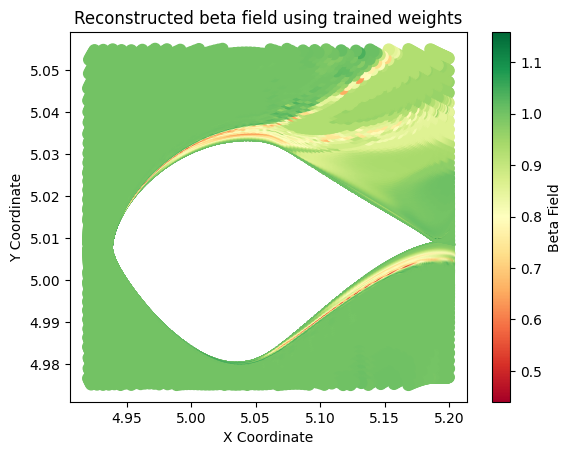

In [27]:
# Create a scatter plot
plt.scatter(x1, y1, c=y2,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
plt.colorbar(label='Beta Field')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Reconstructed beta field using trained weights')
plt.show()

In [28]:
# # Define the file path
# file_path = '/content/drive/MyDrive/beta33.txt'

# # Save the ndarray to a text file with 10 decimal points
# np.savetxt(file_path, y2, fmt='%.10f')

In [29]:
dff = pd.read_csv("/content/drive/MyDrive/data_set4.csv")

# dff.loc[dff['beta']<0.995, "beta"] = 1.5
# dff.loc[dff['beta']>1.005, "beta"] = 1.5


frames = [dff]
ff = []

for item in frames:
  xc = np.array(item['x'])
  yc = np.array(item['y'])
  b = np.array(item['beta'])
  ff1 = np.array(item['feature1'])
  ff2 = np.array(item['feature2'])
  ff3 = np.array(item['feature3'])
  # ff4 = np.array(item['feature4'])
  ff5 = np.array(item['feature5'])
  ff6 = np.array(item['feature6'])

  # Normalize x and y coordinates
  min_range = -5.0
  max_range = 5.0
  xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
  yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))


  x1,y1,b1,f1,f2,f3,f4,f5,f6 = [[] for i in range(9)]
  # Filter data for the specified range of coordinates
  for i in range(len(xc)):
      x1.append(xc[i])
      y1.append(yc[i])
      b1.append(b[i])
      f1.append(ff1[i])
      f2.append(ff2[i])
      f3.append(ff3[i])
      # f4.append(ff4[i])
      f5.append(ff5[i])
      f6.append(ff6[i])

  modified_data = {
  'x': np.array(x1),
  'y': np.array(y1),
  'beta': np.array(b1),
  'feature1': np.array(f1),
  'feature2': np.array(f2),
  'feature3': np.array(f3),
  # 'feature4': np.array(f4),
  'feature5': np.array(f5),
  'feature6': np.array(f6)
  }


  ff.append(pd.DataFrame(modified_data))

dff3 = pd.concat(ff)



In [30]:
dff4 = dff3.drop(['x','y','beta'],axis=1)
X2 = dff4.values
X2 = torch.FloatTensor(X2)
y2 = new_model.forward(X2)
y2 = y2.detach().numpy()

In [31]:
# Define the file path
file_path = '/content/drive/MyDrive/beta44.txt'

# Save the ndarray to a text file with 10 decimal points
np.savetxt(file_path, y2, fmt='%.10f')

In [32]:
y2.shape

(104178, 1)

In [33]:
y2

array([[1.0004866],
       [0.9999419],
       [1.0003136],
       ...,
       [1.0849724],
       [1.0849724],
       [1.0849724]], dtype=float32)